# A/B Testing Assignment
## 1. Course_page_actions dataset
Testing that average duration for the group experiment is bigger than the average duration in group control. So, we compare the average duration of both by the meaning of their difference, which shall be positive value bigger than zero; this is the Alternative Hypothesis. On the other hand, average duration for both groups shall be equal or the difference to be inverted. That to be tested on samples of the data (central limit theorem)

In [18]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading, exploring and cleaning the data

In [17]:
df = pd.read_csv('Datasets/course_page_actions.csv')  # uploading the dataset into a dataframe variable
df.head(10)  #list the first ten rows of the created dataframe

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437
5,2016-09-24 22:18:15.857434,266695,experiment,view,151.235475
6,2016-09-24 22:42:41.218757,701620,control,view,302.951552
7,2016-09-24 22:43:35.119748,701620,control,enroll,NaN
8,2016-09-25 01:21:10.649300,321250,experiment,view,98.678583
9,2016-09-25 01:23:19.800167,439910,control,view,61.234458


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4069 entries, 0 to 4068
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4069 non-null   object 
 1   id         4069 non-null   int64  
 2   group      4069 non-null   object 
 3   action     4069 non-null   object 
 4   duration   4044 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 159.1+ KB


From the data information, it seems that, there are Missing values in the `duration` property

In [47]:
df2=df.drop(df[np.isnan(df['duration'])].index)
df2

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437
...,...,...,...,...,...
4064,2017-01-18 09:39:08.046251,931490,control,view,58.846204
4065,2017-01-18 09:44:15.239671,410222,experiment,view,101.231821
4066,2017-01-18 09:56:26.948171,364458,control,view,293.490566
4067,2017-01-18 10:10:18.293253,443603,experiment,view,149.026959


In [48]:
# Checking for any duplicate values
df2.nunique()

timestamp    4044
id           4028
group           2
action          2
duration     4028
dtype: int64

Above line shows _Duplication_ in the dataset id

In [61]:
df3=df2.drop(df2[df2.duplicated('id')].index)  # removing duplicates
df3

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437
...,...,...,...,...,...
4064,2017-01-18 09:39:08.046251,931490,control,view,58.846204
4065,2017-01-18 09:44:15.239671,410222,experiment,view,101.231821
4066,2017-01-18 09:56:26.948171,364458,control,view,293.490566
4067,2017-01-18 10:10:18.293253,443603,experiment,view,149.026959


In [63]:
df3.shape

(4028, 5)

### Testing on the data

In [64]:
obs_diff = df3[df3.group=='experiment'].duration.mean()- df3[df3.group=='control'].duration.mean()
obs_diff  #observed difference, this is denoting the alternative hypothesis in the provided sample of data

15.48997567909727

Forming multiple means' samples of data representing the original data but normal distributed

In [65]:
diff=[]
for _ in range(10000):  #10000 samples, we do not need the counter '_'
    sample=df3.sample(df.shape[0],replace=True)  #create a sample, with the same DataFrame size
    #build a list of differences of means
    diff.append(sample[sample.group=='experiment'].duration.mean()- sample[sample.group=='control'].duration.mean())
    
#these are two datasets of samples, which shall be normal distributed. Instead, we get the differences of their means-
#so we have one dataset, which aslo shall be normal distributed. By this way we have created the means dataset-
#representing the original dataset.

diff mean is: 15.521903883655721


Text(0.5, 1.0, 'Original dataset as samples')

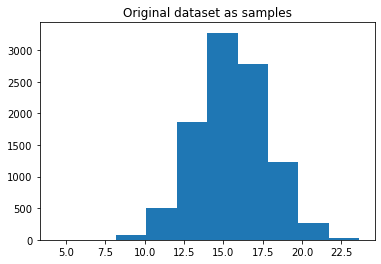

In [66]:
diff=np.array(diff)
print(f'diff mean is: {diff.mean()}')
plt.hist(diff)
plt.title('Original dataset as samples')

**Let's shift the data to a *zero* mean**, as there is no difference in the duration in the _Null Hypothesis_

(array([  22.,  155.,  680., 1974., 2952., 2534., 1252.,  374.,   52.,
           5.]),
 array([-8.20139214, -6.4745446 , -4.74769707, -3.02084954, -1.294002  ,
         0.43284553,  2.15969307,  3.8865406 ,  5.61338814,  7.34023567,
         9.0670832 ]),
 <BarContainer object of 10 artists>)

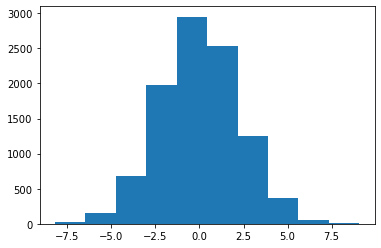

In [67]:
null=np.random.normal(0,diff.std(),diff.size)
plt.hist(null)

0.0

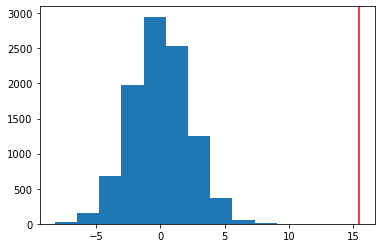

In [68]:
plt.hist(null)
plt.axvline(obs_diff,c='red')
(null>obs_diff).mean()

The _Probability_ is 0 i.e. less than 5% We **reject the Null hypothesis**, and approve the _Alternative Hypothesis_

- The other way; but didn't work!
<br>Because this method (proportions_ztest) apply on counter elements, and not using 'mean'

In [88]:
import statsmodels.api as sm

duration_exprt = df3[df3.group=='experiment'].duration.mean()
duration_cntrl = df3[df3.group=='control'].duration.mean()
n_exprt = df3.query('group=="experiment"').shape[0]
n_cntrl = df3.query('group=="control"').shape[0]
z_score, pval=sm.stats.proportions_ztest\
              (np.array([(duration_exprt),(duration_cntrl)]),np.array([n_exprt,n_cntrl]),alternative='larger')
z_score, pval  #Ignore this solution

(0.4961414057163069, 0.30989732390375024)

## 2. classroom_actions dataset

In [71]:
df_clsrom = pd.read_csv('Datasets/classroom_actions.csv')  # uploading the dataset into a dataframe variable
df_clsrom.head(10)  #list the first ten rows of the created dataframe

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False
5,2015-08-10 19:58:07.004051,763661,control,55,False
6,2015-08-10 20:10:42.230941,634832,control,97,False
7,2015-08-10 20:29:33.099757,849686,control,97,False
8,2015-08-10 21:03:33.719529,929620,experiment,90,False
9,2015-08-10 22:47:00.254898,512761,experiment,59,False


In [72]:
df_clsrom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829 entries, 0 to 3828
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   timestamp   3829 non-null   object
 1   id          3829 non-null   int64 
 2   group       3829 non-null   object
 3   total_days  3829 non-null   int64 
 4   completed   3829 non-null   bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 123.5+ KB


No Null data

In [73]:
# Checking for any duplicate values
df_clsrom.nunique()

timestamp     3829
id            3829
group            2
total_days     125
completed        2
dtype: int64

Values seems logic, with no duplication
### Testing on the data

In [98]:
obs_diff2 = df_clsrom[df_clsrom['group']=='experiment'].completed.mean() - \
           df_clsrom[df_clsrom['group']=='control'].completed.mean()
obs_diff2  #observed difference, this is denoting the alternative hypothesis in the provided sample of data

0.02153829499022919

Forming multiple means' samples of data representing the original data but normal distributed

In [100]:
diff2=[]
for _ in range(10000):  #10000 samples, we do not need the counter '_'
    sample=df_clsrom.sample(df_clsrom.shape[0],replace=True)  #create a sample, with the same DataFrame size
    #build a list of differences of means
    diff2.append(sample[sample.group=='experiment'].completed.mean() - sample[sample.group=='control'].completed.mean())
    
#these are two datasets of samples, which shall be normal distributed. Instead, we get the differences of their means-
#so we have one dataset, which aslo shall be normal distributed. By this way we have created the means dataset-
#representing the original dataset.

diff mean is: 0.02128598913181753


Text(0.5, 1.0, 'Original dataset as samples')

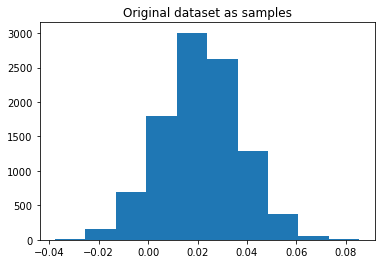

In [101]:
diff2=np.array(diff2)
print(f'diff mean is: {diff2.mean()}')
plt.hist(diff2)
plt.title('Original dataset as samples')

**Let's shift the data to a *zero* mean**, as there is no difference in the duration in the _Null Hypothesis_

(array([  15.,  100.,  592., 1661., 2907., 2726., 1504.,  428.,   59.,
           8.]),
 array([-0.06137924, -0.04888318, -0.03638713, -0.02389107, -0.01139501,
         0.00110104,  0.0135971 ,  0.02609316,  0.03858921,  0.05108527,
         0.06358133]),
 <BarContainer object of 10 artists>)

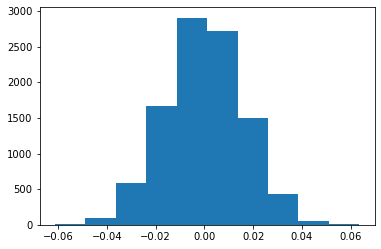

In [102]:
null2=np.random.normal(0,diff2.std(),diff2.size)
plt.hist(null2)

0.0867

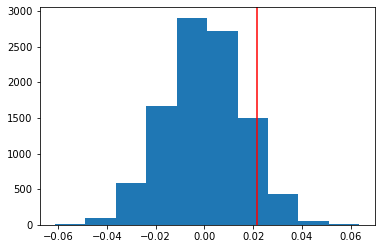

In [103]:
plt.hist(null2)
plt.axvline(obs_diff2, c='red')
(null2>obs_diff2).mean()

The _Probability_ is 8.7% i.e. bigger than 5% We **reject the Alternative hypothesis**, and the _Null Hypothesis_ is the winner